In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
from collections import Counter
from functools import reduce
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
##### Import the exercise_df dataset #####

exercise_df = pd.read_csv('/content/exercise.csv')

exercise_df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [4]:
##### Import the calories dataset #####

calories_df = pd.read_csv('/content/calories.csv')

calories_df.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [5]:
##### Show the shape of two dataset #####

print("The shape of exercise dataset is :", exercise_df.shape,'\n')
print("The shape of calories dataset is :", calories_df.shape,'\n')

The shape of exercise dataset is : (15000, 8) 

The shape of calories dataset is : (15000, 2) 



In [6]:
##### Join or merge the two datasets in one #####

df = exercise_df.merge(calories_df, on = ['User_ID'])

df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [7]:
##### show the # of records and features of this new dataset #####

print("# of records of this dataset is = ", df.shape[0],'\n')
print("# of feature of this dataset is = ", df.shape[1],'\n')

##### Comments after analysis #####
"""
Here, we see that the number of records are same after being joined.
"""

# of records of this dataset is =  15000 

# of feature of this dataset is =  9 



'\nHere, we see that the number of records are same after being joined.\n'

In [8]:
##### Check the missing value presence in the dataset or not #####
if df.isnull().sum().sum() == 0:
  print("There is NO NULL value in the dataset.")
else:
  print("The NULL value presence in the dataset.")

There is NO NULL value in the dataset.


In [9]:
##### User_ID column should be deleted #####
df.drop('User_ID', axis = 1, inplace = True)
print("User_ID column has been deleted from the dataset.\n")

df.head()

User_ID column has been deleted from the dataset.



Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  female   27   154.0    58.0      10.0        81.0       39.8      35.0

EDA - Exploratory data analysis 

The value counts of this Gender feature is.


female    7553
male      7447
Name: Gender, dtype: int64 





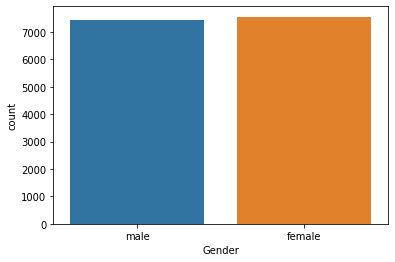

In [10]:
##### Plot the number of gender of the dataset ####
print("The value counts of this Gender feature is.\n\n")
print(df.loc[:, 'Gender'].value_counts(),'\n\n\n')
sns.countplot(df.loc[:, 'Gender'], data = df)
plt.show()

The distribution of the Age column is




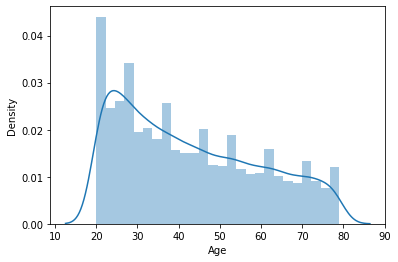

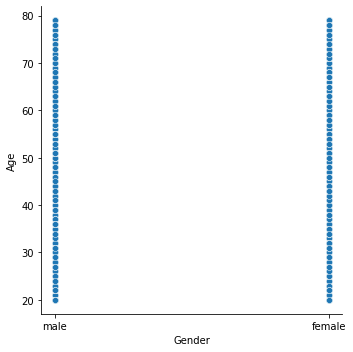

In [11]:
##### Plot the distribution of the Age column #####
print("The distribution of the Age column is\n\n")

sns.distplot(df.loc[:, 'Age'], kde = True)

plt.show()

##### Plot the distribution of Age with the Gender column #####

sns.relplot(x = 'Gender', y = 'Age', data = df)

plt.show()

The distribution of Height is given below.




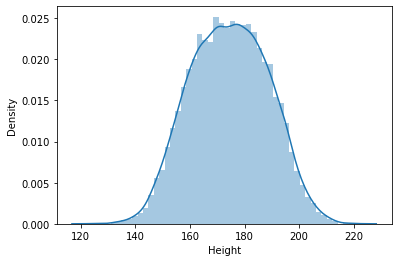

The relationship of Height and calories is given below.




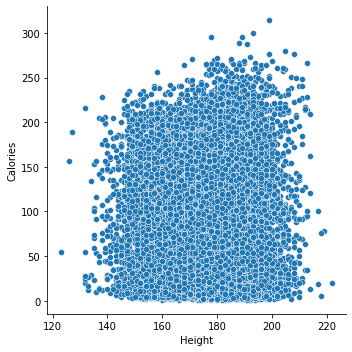

The relationship of Height, Gender and calories is given below.




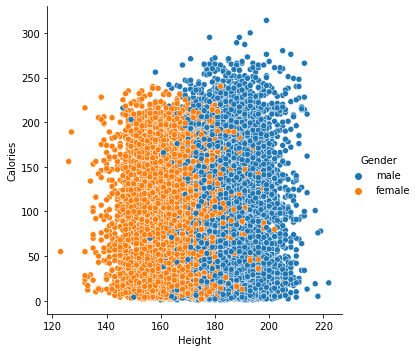

The relationship of Height, Gender and calories is given below.




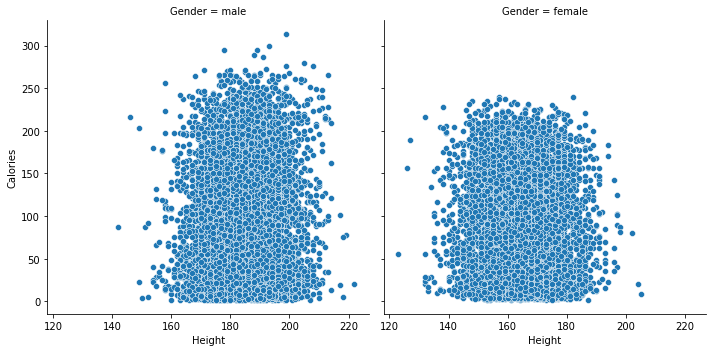

In [12]:
##### Plot the distribution of Height #####
print("The distribution of Height is given below.\n\n")
sns.distplot(df.loc[:, 'Height'], kde = True)
plt.show()

##### Show the relationship between Age and Calories #####
print("The relationship of Height and calories is given below.\n\n")
sns.relplot(x = 'Height', y = 'Calories', data = df)
plt.show()

##### Show the relationship between Height, age and calories #####
print("The relationship of Height, Gender and calories is given below.\n\n")
sns.relplot(x = 'Height', y = 'Calories', hue = 'Gender', data = df)
plt.show()

##### Show the relationship between Height, age and calories #####
print("The relationship of Height, Gender and calories is given below.\n\n")
sns.relplot(x = 'Height', y = 'Calories', col = 'Gender', data = df)
plt.show()

The distribution of Duration is given below.




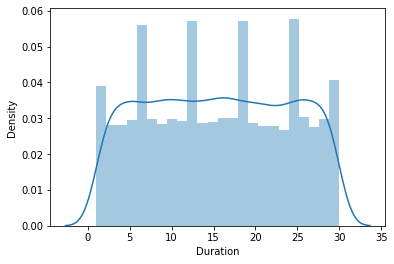

The histrogram of Duration plot is given below.




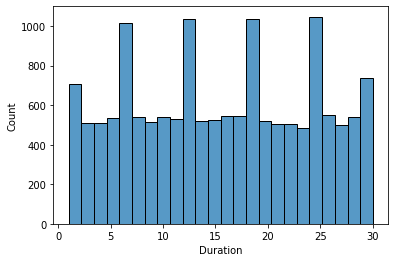

The relation of this column with calories plot is given below.




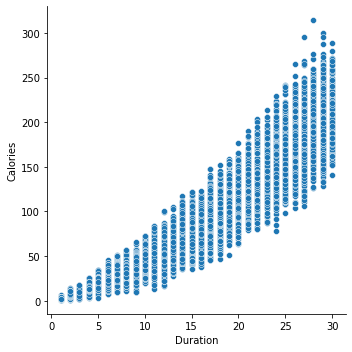

The relation of this column with calories with Gender separately plot is given below.




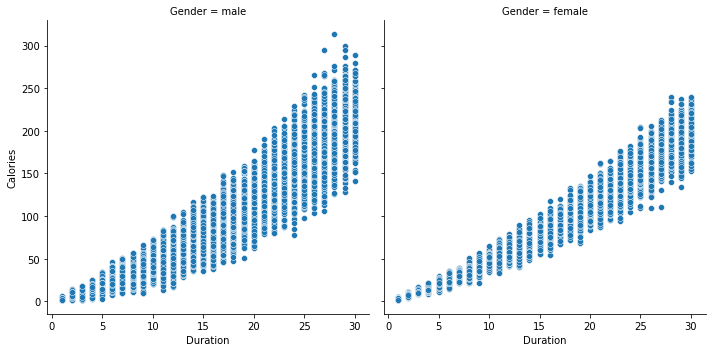

The relation of this column with calories, and Age with Gender separately plot is given below.




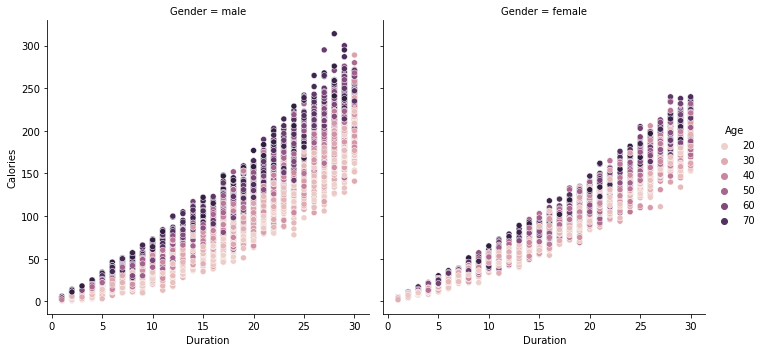

The relation of this column with calories, Weight, and Age with Gender separately plot is given below.




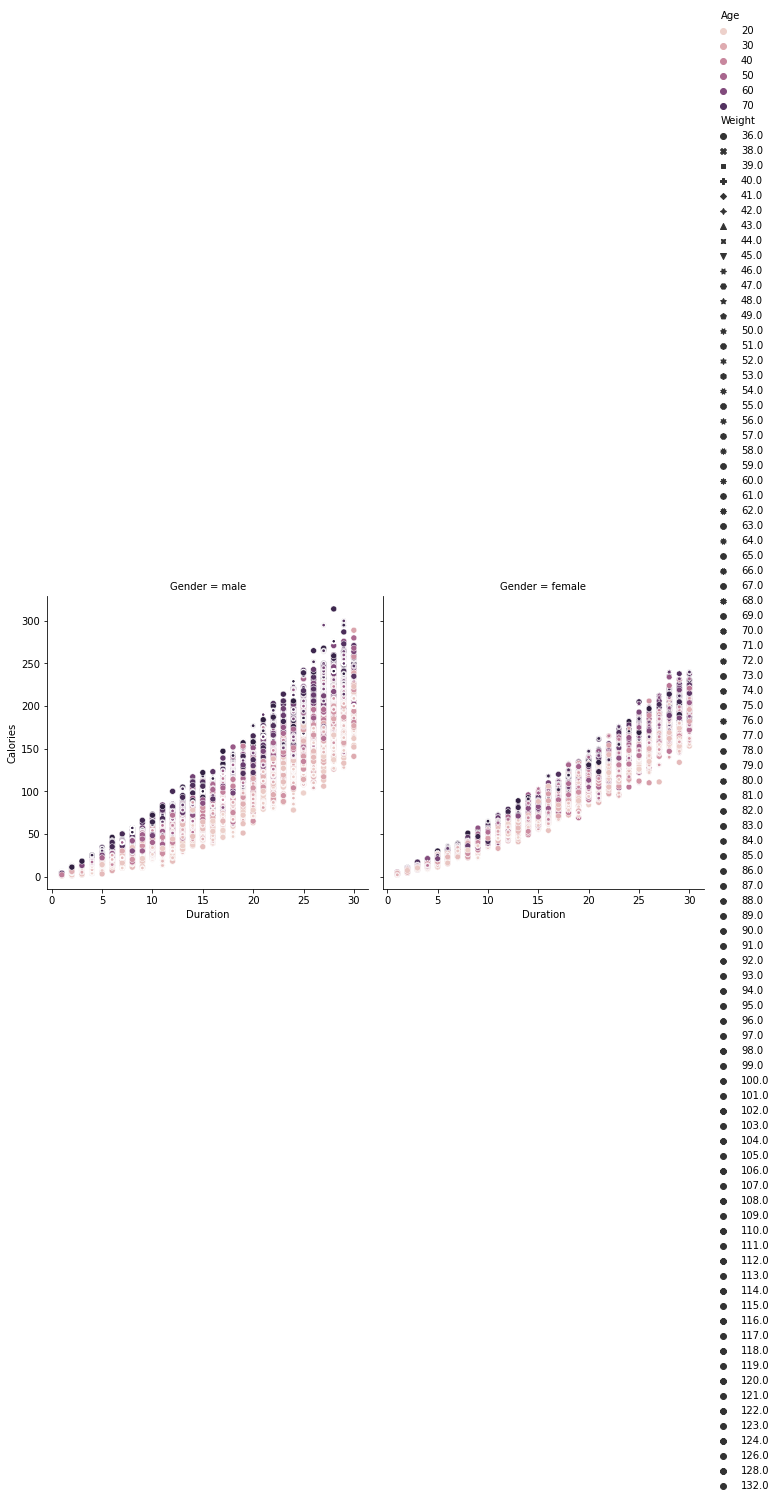

In [13]:
##### Plot the distribution of Duration #####
print("The distribution of Duration is given below.\n\n")
sns.distplot(df.loc[:, 'Duration'])
plt.show()

##### Plot the histogram of this column #####
print("The histrogram of Duration plot is given below.\n\n")
sns.histplot(df.loc[:, 'Duration'])
plt.show()

##### Plot the relation of this column with calories #####
print("The relation of this column with calories plot is given below.\n\n")
sns.relplot(x = 'Duration', y = 'Calories', data = df)
plt.show()

##### Plot the relation of this column with calories with Gender separately #####
print("The relation of this column with calories with Gender separately plot is given below.\n\n")
sns.relplot(x = 'Duration', y = 'Calories', col = 'Gender', data = df)
plt.show()

##### Plot the relation of this column with calories, and Age with Gender separately #####
print("The relation of this column with calories, and Age with Gender separately plot is given below.\n\n")
sns.relplot(x = 'Duration', y = 'Calories', col = 'Gender', hue = 'Age', data = df)
plt.show()

##### Plot the relation of this column with calories, Weight, and Age with Gender separately #####
print("The relation of this column with calories, Weight, and Age with Gender separately plot is given below.\n\n")
sns.relplot(x = 'Duration', y = 'Calories', col = 'Gender', hue = 'Age', style = 'Weight', data = df)
plt.show()

The distribution of Heart Rate is given below.




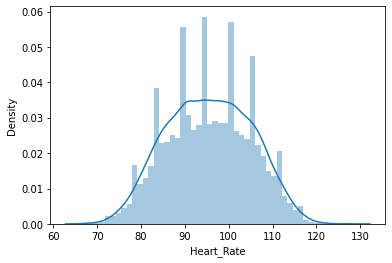

The relation of Heart_Rate with Age is given below.




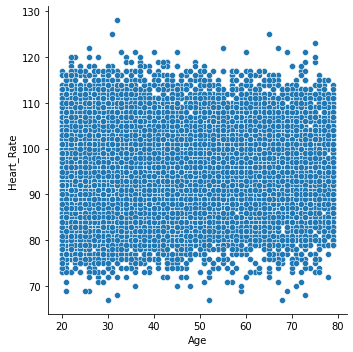

The relation of Heart_Rate with Age and Gender is given below.




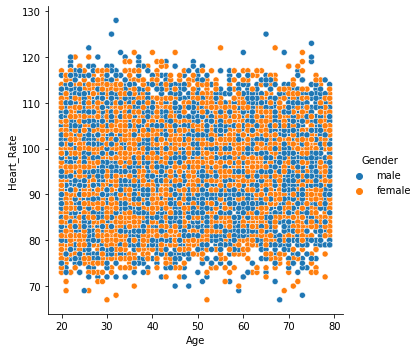

The relation of Heart_Rate with Age and Gender separate is given below.




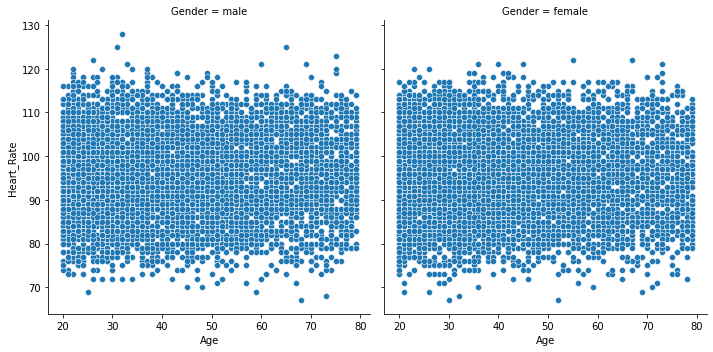

The relation of Heart_Rate with Age and Gender separate is given below.




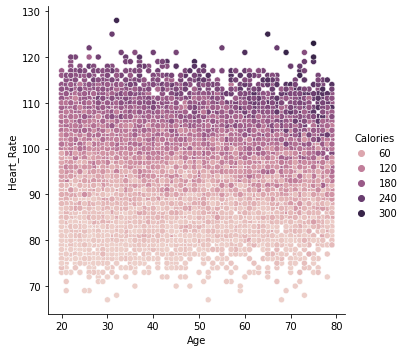

In [14]:
##### Plot the distribution of Heart_Rate #####
print("The distribution of Heart Rate is given below.\n\n")
sns.distplot(df.loc[:, 'Heart_Rate'], kde = True)
plt.show()

##### Plot the relation of Heart_Rate with Age#####
print("The relation of Heart_Rate with Age is given below.\n\n")
sns.relplot(x = 'Age', y = 'Heart_Rate', data = df)
plt.show()

##### Plot the relation of Heart_Rate with Age and Gender #####
print("The relation of Heart_Rate with Age and Gender is given below.\n\n")
sns.relplot(x = 'Age', y = 'Heart_Rate', hue = 'Gender', data = df)
plt.show()

##### Plot the relation of Heart_Rate with Age and Gender separately#####
print("The relation of Heart_Rate with Age and Gender separate is given below.\n\n")
sns.relplot(x = 'Age', y = 'Heart_Rate', col = 'Gender', data = df)
plt.show()

##### Plot the relation of Heart_Rate with Age and Gender separately#####
print("The relation of Heart_Rate with Age and Gender separate is given below.\n\n")
sns.relplot(x = 'Age', y = 'Heart_Rate', hue = 'Calories', data = df)
plt.show()

The distribution of body temp is given below.




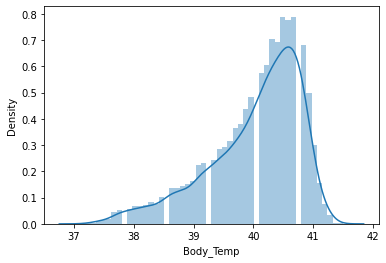

The distribution of body temp with Heart Rate is given below.




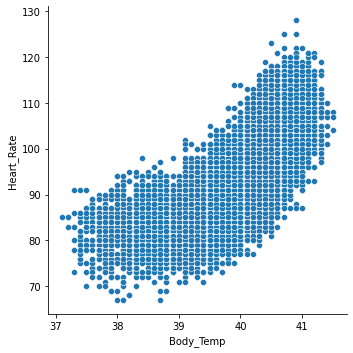

The distribution of body temp with Heart Rate is given below.




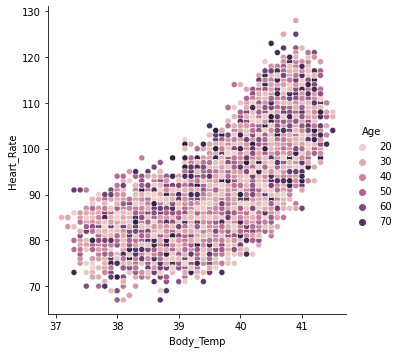

The distribution of body temp with Heart Rate and Gender is given below.




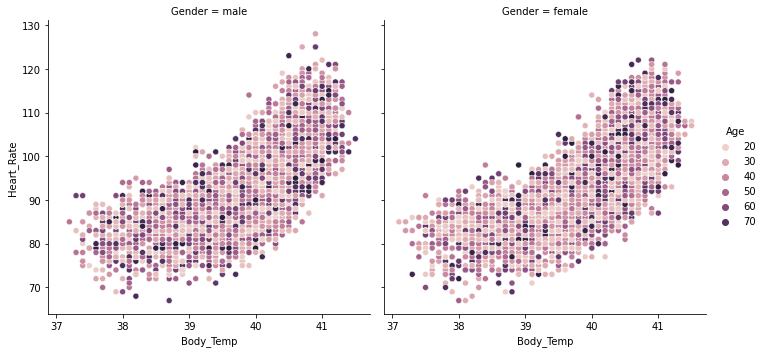

The distribution of body temp with Heart Rate and Gender is given below.




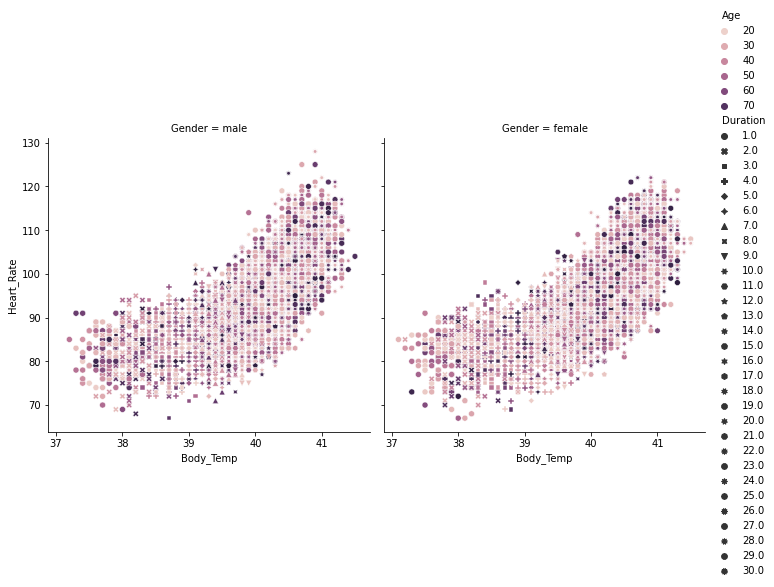

In [15]:
##### Plot the distribution of Body_Temp #####
print("The distribution of body temp is given below.\n\n")
sns.distplot(df.loc[:, 'Body_Temp'])
plt.show()

##### Plot the relationship of Body_Temp and Heart_Rate #####
print("The distribution of body temp with Heart Rate is given below.\n\n")
sns.relplot(x = 'Body_Temp', y = 'Heart_Rate', data = df)
plt.show()

##### Plot the relationship of Body_Temp and Heart_Rate with Age #####
print("The distribution of body temp with Heart Rate is given below.\n\n")
sns.relplot(x = 'Body_Temp', y = 'Heart_Rate', hue = 'Age', data = df)
plt.show()

##### Plot the relationship of Body_Temp and Heart_Rate with Gender #####
print("The distribution of body temp with Heart Rate and Gender is given below.\n\n")
sns.relplot(x = 'Body_Temp', y = 'Heart_Rate', hue = 'Age', col = 'Gender', data = df)
plt.show()

##### Plot the relationship of Body_Temp and Heart_Rate with Gender, Duration #####
print("The distribution of body temp with Heart Rate and Gender is given below.\n\n")
sns.relplot(x = 'Body_Temp', y = 'Heart_Rate', hue = 'Age', col = 'Gender', style = 'Duration', data = df)
plt.show()

The relationship of Heart Rate, Duration, Calories and Body Temp is given below.




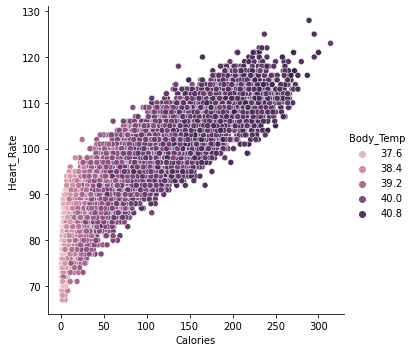




Meaning that, who are burning the calogies gets their Heart Rate increased as well as Body Temperature.

************************************************************************************************************************


In [16]:
##### Plot the realtionship of Heart_Rate, Duration, Calories, Body_Temp #####
print("The relationship of Heart Rate, Duration, Calories and Body Temp is given below.\n\n")
sns.relplot(x = 'Calories', y = 'Heart_Rate', hue = 'Body_Temp', data = df)
plt.show()

print('\n\n')
print("Meaning that, who are burning the calogies gets their Heart Rate increased as well as Body Temperature.\n")
print("*"*120)

The relationship of Heart Rate,Calories and Age_Range is given below.




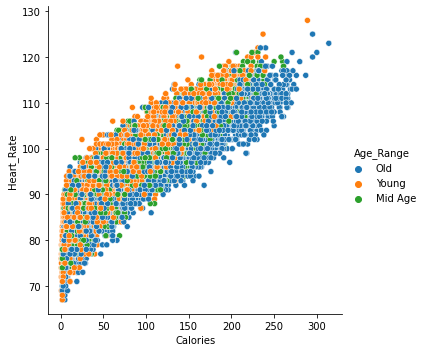




Meaning that, who are burning the calogies gets their Heart Rate increased as well as Body Temperature.

************************************************************************************************************************


In [17]:
##### Create manually Age Range with the Age data #####
age_range_ = {}
for index_, age_ in enumerate(df.loc[:, 'Age']):
  if (age_ >= 12) and (age_ < 20):
    age_range_[index_] = 'Teenage'
  elif (age_ >= 20) and (age_ < 35):
    age_range_[index_] = 'Young'
  elif (age_ >= 35) and (age_ <= 45):
    age_range_[index_] = 'Mid Age'
  else:
    age_range_[index_] = 'Old'
  
##### Create a column named Age Range with that Dict #####

df['Age_Range'] = age_range_.values()


##### Plot the realtionship of Heart_Rate, Duration, Calories, Body_Temp #####
print("The relationship of Heart Rate,Calories and Age_Range is given below.\n\n")
sns.relplot(x = 'Calories', y = 'Heart_Rate', hue = 'Age_Range', data = df)
plt.show()

print('\n\n')
print("Meaning that, who are burning the calogies gets their Heart Rate increased as well as Body Temperature.\n")
print("*"*120)

The relationship of Heart Rate,Calories and Age_Range is given below.




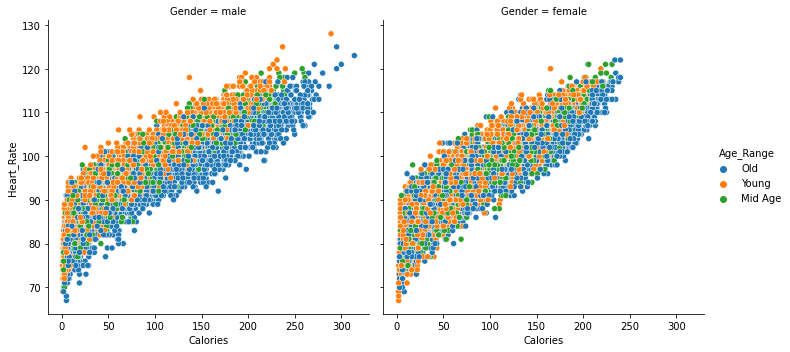




Meaning that, who are burning the calogies gets their Heart Rate increased. Needless to say that, Female Heart_Rate increased.



In [18]:
##### Plot the realtionship of Heart_Rate, Duration, Calories, Body_Temp #####
print("The relationship of Heart Rate,Calories and Age_Range is given below.\n\n")
sns.relplot(x = 'Calories', y = 'Heart_Rate', hue = 'Age_Range', col = 'Gender', data = df)
plt.show()

print('\n\n')
print("Meaning that, who are burning the calogies gets their Heart Rate increased. Needless to say that, Female Heart_Rate increased.\n")

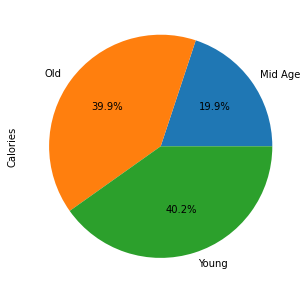

Meaning that, most of the young generation tends to calories burnt than others.



In [19]:
##### Plot a pie chart where we will find that how much % Young generation tends to calories burnt ####
plt.figure(figsize = (5, 6))
df.groupby(['Age_Range'])['Calories'].count().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

print("Meaning that, most of the young generation tends to calories burnt than others.\n")

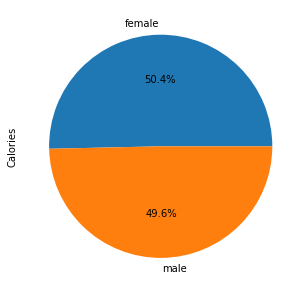

Meaning that, Female tends to burn the calories than male.



In [20]:
##### Which Gender tends to burn the calories ######
plt.figure(figsize = (5, 6))
df.groupby(['Gender'])['Calories'].count().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

print("Meaning that, Female tends to burn the calories than male.\n")

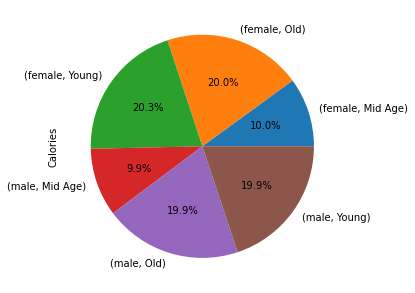

It is surprised to see that, (Young female and Old Female) tends to burn the Calories than others


In [21]:
##### Which Gender tends to burn the calories based on Generation ######
plt.figure(figsize = (5, 6))
df.groupby(['Gender', 'Age_Range'])['Calories'].count().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

print("It is surprised to see that, (Young female and Old Female) tends to burn the Calories than others")

In [22]:
##### Find the realtionship Gender, Age_Range, Heart_Rate, Body_Temp and Calories #####
df.groupby(['Gender', 'Age_Range'])['Heart_Rate', 'Body_Temp', 'Calories'].mean()

Heart_Rate  Body_Temp    Calories
Gender Age_Range                                   
female Mid Age     95.634973  40.042886   89.261968
       Old         95.623960  40.036473   94.042596
       Young       95.084100  39.992017   81.791064
male   Mid Age     95.763992  40.035873   88.837492
       Old         95.560027  40.028203  105.075788
       Young       95.633467  40.031757   77.864185

In [23]:
##### Find out, on Age Range basis what the average of burning the calories in Gender #####
df.pivot_table(index = 'Age_Range', columns = 'Gender', values = 'Calories', aggfunc = 'mean')

Gender        female        male
Age_Range                       
Mid Age    89.261968   88.837492
Old        94.042596  105.075788
Young      81.791064   77.864185

The relationship of Calories, Duration, Gender is given below.




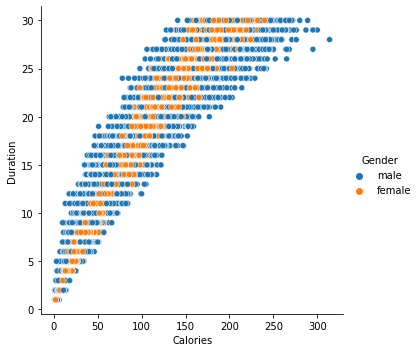

In [24]:
##### Plot the realtionship of Calories, Duration, Gender #####
print("The relationship of Calories, Duration, Gender is given below.\n\n")
sns.relplot(x = 'Calories', y = 'Duration', hue = 'Gender', data = df)
plt.show()

         Duration   Calories
Gender                      
female  15.502185  88.153052
male    15.559420  90.945750 




<Figure size 720x432 with 0 Axes>

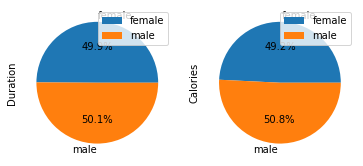

In [25]:
##### show the Duration and Calories #####
print(df.groupby('Gender')['Duration','Calories'].mean(),'\n\n')

plt.figure(figsize = (10, 6))
df.groupby('Gender')['Duration','Calories'].mean().plot(kind = 'pie', subplots = True, autopct='%1.1f%%')
plt.show()

In [26]:
##### show the Duration and Calories #####
df.groupby(['Age_Range', 'Gender'])['Duration','Calories'].mean()

Duration    Calories
Age_Range Gender                       
Mid Age   female  15.791888   89.261968
          male    15.538098   88.837492
Old       female  15.672546   94.042596
          male    15.562710  105.075788
Young     female  15.190867   81.791064
          male    15.566734   77.864185

<Figure size 720x432 with 0 Axes>

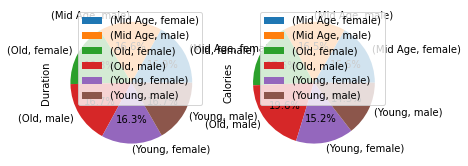

In [27]:
plt.figure(figsize = (10, 6))
df.groupby(['Age_Range', 'Gender'])['Duration','Calories'].mean().plot(kind = 'pie', subplots = True, autopct='%1.1f%%')
plt.show()

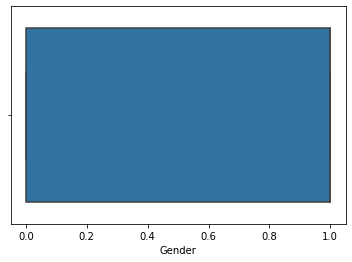

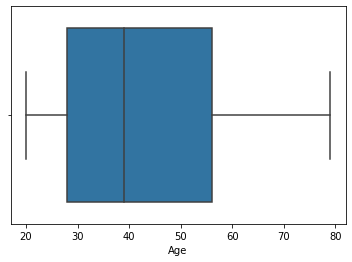

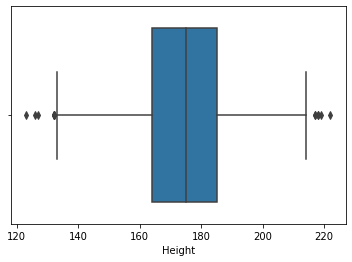

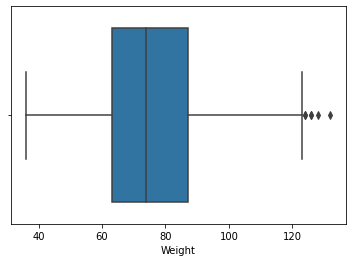

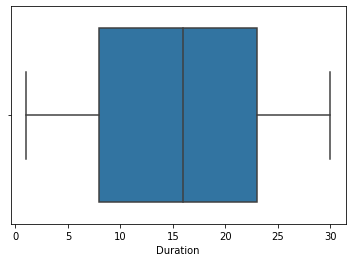

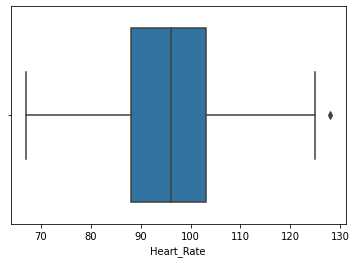

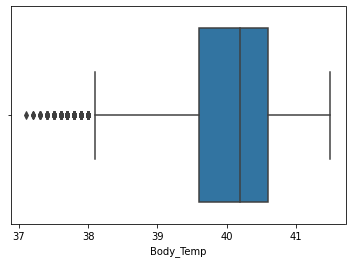

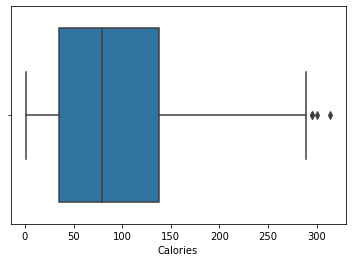

In [80]:
#### Check the boxplot for determine the outliers in the dataset #####
for column_ in df.columns:
  sns.boxplot(df.loc[:, column_])
  plt.show()

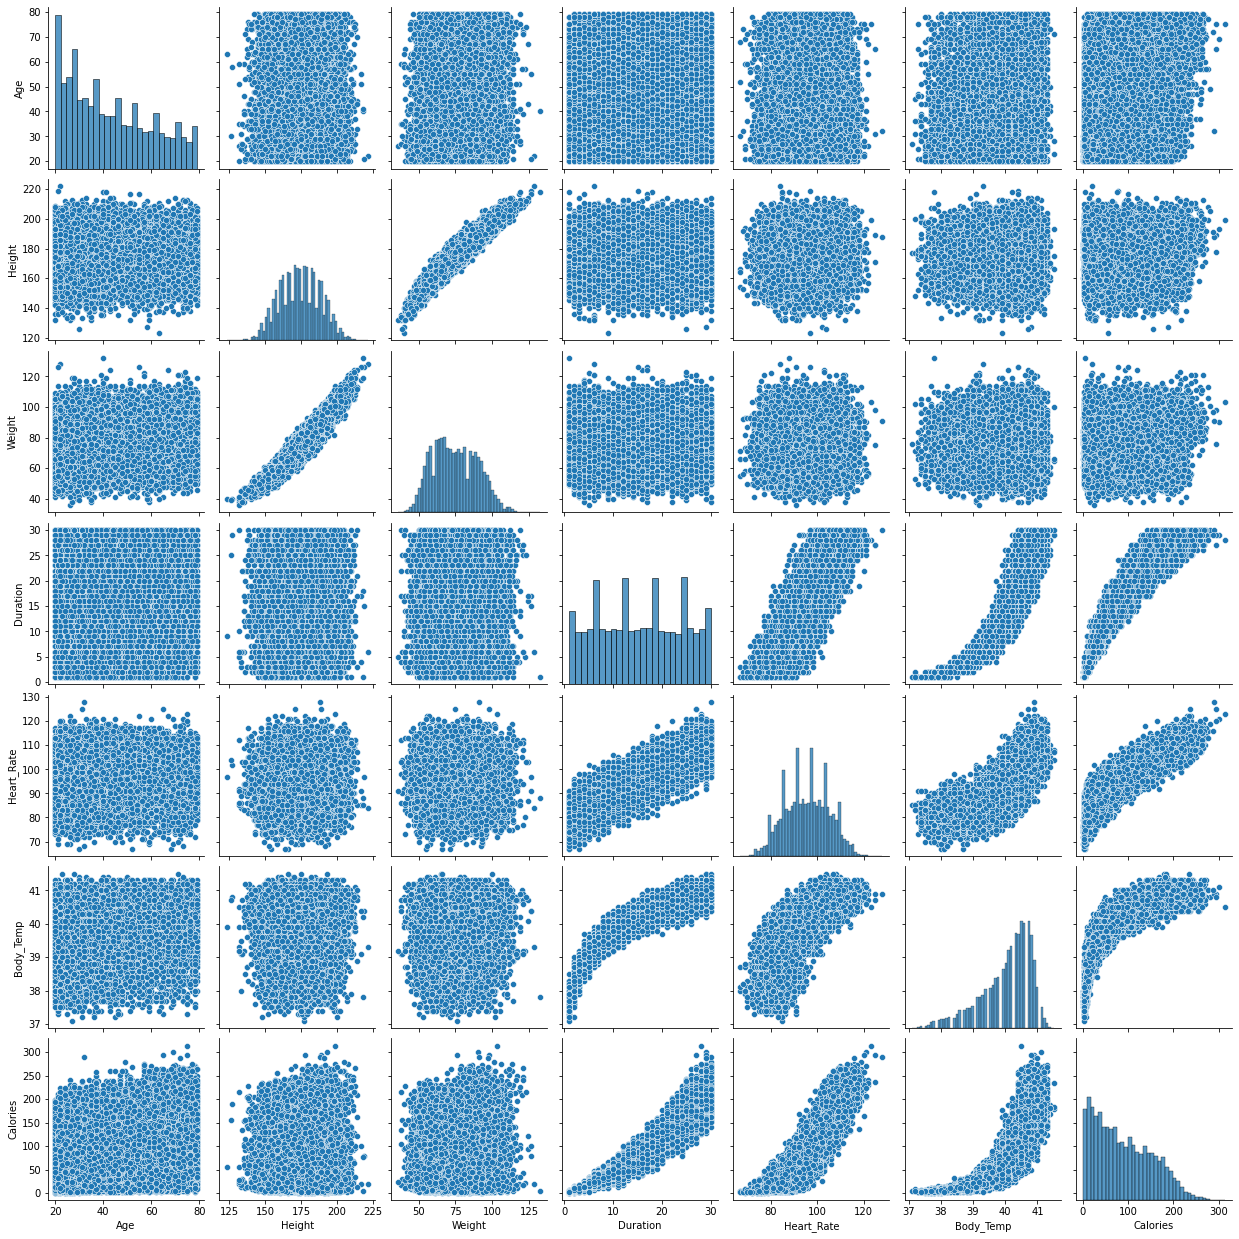

In [29]:
##### Plot the pairplot #####
sns.pairplot(df)
plt.show()

In [30]:
##### Describe thw whole dataset #####
df.describe()

Age        Height        Weight      Duration    Heart_Rate  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      42.789800    174.465133     74.966867     15.530600     95.518533   
std       16.980264     14.258114     15.035657      8.319203      9.583328   
min       20.000000    123.000000     36.000000      1.000000     67.000000   
25%       28.000000    164.000000     63.000000      8.000000     88.000000   
50%       39.000000    175.000000     74.000000     16.000000     96.000000   
75%       56.000000    185.000000     87.000000     23.000000    103.000000   
max       79.000000    222.000000    132.000000     30.000000    128.000000   

          Body_Temp      Calories  
count  15000.000000  15000.000000  
mean      40.025453     89.539533  
std        0.779230     62.456978  
min       37.100000      1.000000  
25%       39.600000     35.000000  
50%       40.200000     79.000000  
75%       40.600000    138.000000  
max       41.500000    314.000000

In [31]:
##### Find the data correlation #####
df.corr()

Age    Height    Weight  Duration  Heart_Rate  Body_Temp  \
Age         1.000000  0.009554  0.090094  0.013247    0.010482   0.013175   
Height      0.009554  1.000000  0.958451 -0.004625    0.000528   0.001200   
Weight      0.090094  0.958451  1.000000 -0.001884    0.004311   0.004095   
Duration    0.013247 -0.004625 -0.001884  1.000000    0.852869   0.903167   
Heart_Rate  0.010482  0.000528  0.004311  0.852869    1.000000   0.771529   
Body_Temp   0.013175  0.001200  0.004095  0.903167    0.771529   1.000000   
Calories    0.154395  0.017537  0.035481  0.955421    0.897882   0.824558   

            Calories  
Age         0.154395  
Height      0.017537  
Weight      0.035481  
Duration    0.955421  
Heart_Rate  0.897882  
Body_Temp   0.824558  
Calories    1.000000

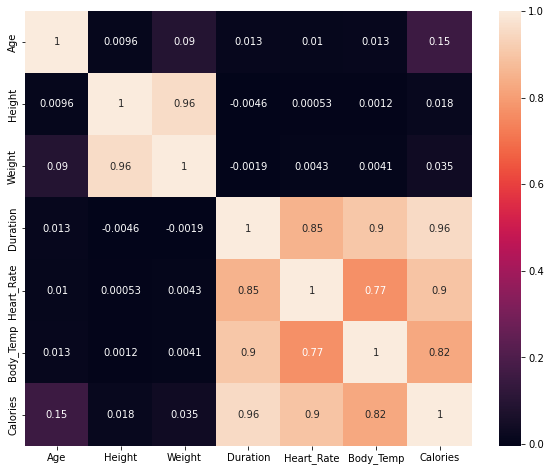




Surprised To See That, The Correlation Between The Features Are Quite High. Multicolinarity Happens In This Dataset.


In [32]:
##### Do the same thing with heatmap #####
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

print("\n\n")

print("Surprised to see that, the correlation between the features are quite high. multicolinarity happens in this dataset.".title())

In [33]:
##### Label Encoding the Gender column #####
df.loc[:, 'Gender'] = df.loc[:, 'Gender'].map({'male': 0, 'female': 1})

##### Drop the Age_Range column #####
df.drop('Age_Range', axis = 1, inplace = True)

df.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0       0   68   190.0    94.0      29.0       105.0       40.8     231.0
1       1   20   166.0    60.0      14.0        94.0       40.3      66.0
2       0   69   179.0    79.0       5.0        88.0       38.7      26.0
3       1   34   179.0    71.0      13.0       100.0       40.5      71.0
4       1   27   154.0    58.0      10.0        81.0       39.8      35.0

In [81]:
##### split the dataset into X and y and train and test #####

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

##### Preprocessing the dataset using Standard Scaler #####

standard_scaler_ = StandardScaler()
X = standard_scaler_.fit_transform(X)

##### Split the dataset into train and test #####

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, shuffle = True)

print(f"The # of X_train is = {X_train.shape}\n")
print(f"The # of X_test  is = {X_test.shape}\n")
print(f"The # of y_train is = {y_train.shape}\n")
print(f"The # of y_test  is = {y_test.shape}\n")

The # of X_train is = (10500, 7)

The # of X_test  is = (4500, 7)

The # of y_train is = (10500,)

The # of y_test  is = (4500,)



In [35]:
##### Linear Regression to evaluate the model #####
LinearRegression_ = LinearRegression()
LinearRegression_.fit(X_train, y_train)

predicted_ = LinearRegression_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')


y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  132.91911580007897 

Mean absolute Error of LR is  =  8.451945920538371 

The R2 score of LR is in here =  0.9648551304095715 

The adjusted R2 score of here =  0.9648003632485891 



Actual   Predicted
3618    85.0   97.562984
1970    90.0   96.763433
4267    95.0  100.207533
3598   182.0  163.136817
91      37.0   29.478016
3822   120.0  111.274423
3013    42.0   42.457323

In [36]:
##### Use SGD Regressor  to evaluate the model #####

SGDRegressor_ = SGDRegressor()
SGDRegressor_.fit(X_train, y_train)

predicted_ = SGDRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')


y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  133.19503880089522 

Mean absolute Error of LR is  =  8.43948600074588 

The R2 score of LR is in here =  0.9644860562362182 

The adjusted R2 score of here =  0.9644307139373878 



Actual   Predicted
1793   177.0  178.124070
1393    82.0   81.745970
3724    96.0  113.523865
3218   192.0  179.694580
33      47.0   56.660699
2809    32.0   33.022676
3760    46.0   43.542469

In [37]:
##### Use KNN to evaluate the model #####

KNeighborsRegressor_ = KNeighborsRegressor()
KNeighborsRegressor_.fit(X_train, y_train)

predicted_ = KNeighborsRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  28.18048888888889 

Mean absolute Error of LR is  =  3.8769333333333336 

The R2 score of LR is in here =  0.9925951706414585 

The adjusted R2 score of here =  0.9925836315039898 



Actual  Predicted
3221    24.0       26.4
4329    74.0       74.8
186     12.0       13.2
7       44.0       41.8
662     97.0       97.8
1468    71.0       66.0
1557   113.0      132.4

In [38]:
##### Use SVR to evaluate the model #####

SVR_ = SVR(kernel = 'poly')
SVR_.fit(X_train, y_train)

predicted_ = SVR_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  140.6922089619675 

Mean absolute Error of LR is  =  8.992302682426669 

The R2 score of LR is in here =  0.9623044615747012 

The adjusted R2 score of here =  0.9622457196403786 



Actual   Predicted
406     18.0   -9.670125
375    197.0  164.400934
1276   130.0  121.057087
950     87.0   93.231119
2492    10.0   -9.643210
3721    32.0   52.823963
3310   167.0  138.591283

In [39]:
##### Use Decision Tree Regressor to evalute the model #####

DecisionTreeRegressor_ = DecisionTreeRegressor()
DecisionTreeRegressor_.fit(X_train, y_train)

predicted_ = DecisionTreeRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  29.74111111111111 

Mean absolute Error of LR is  =  3.494 

The R2 score of LR is in here =  0.992431761536076 

The adjusted R2 score of here =  0.9924199677539639 



Actual  Predicted
2310    30.0       30.0
1484   123.0      119.0
723     71.0       73.0
2204    18.0       24.0
2092     7.0        6.0
1709   171.0      175.0
2181   100.0      106.0

In [89]:
##### Linear Regression to evaluate the model #####
RandomForestRegressor_ = RandomForestRegressor()
RandomForestRegressor_.fit(X_train, y_train)

predicted_ = RandomForestRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  8.943297133333335 

Mean absolute Error of LR is  =  1.8539133333333335 

The R2 score of LR is in here =  0.9977020705089817 

The adjusted R2 score of here =  0.9976984895859102 



Actual  Predicted
3999    36.0      38.02
3381    78.0      77.17
2572    89.0      88.12
2679    44.0      43.60
2139     4.0       3.38
87      18.0      17.27
1136   261.0     254.74

In [41]:
##### Adaboost Regressor to evaluate the model #####

AdaBoostRegressor_ = AdaBoostRegressor()
AdaBoostRegressor_.fit(X_train, y_train)

predicted_ = AdaBoostRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  136.2172932883295 

Mean absolute Error of LR is  =  9.264423432876692 

The R2 score of LR is in here =  0.9638787225044784 

The adjusted R2 score of here =  0.963822433781756 



Actual   Predicted
2123    44.0   45.844677
1459    45.0   51.565347
882     44.0   45.568465
3642    41.0   45.568465
320    220.0  222.603175
1227    77.0   71.525126
3448    77.0   81.289583

In [42]:
##### GradientBoost Regressor use to evaluate the model #####

GradientBoostingRegressor_ = GradientBoostingRegressor()
GradientBoostingRegressor_.fit(X_train, y_train)

predicted_ = GradientBoostingRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  14.106088932852174 

Mean absolute Error of LR is  =  2.7067634341323803 

The R2 score of LR is in here =  0.9963782990978641 

The adjusted R2 score of here =  0.9963726553075002 



Actual   Predicted
856     33.0   34.175747
1087    14.0   16.150985
3216    30.0   33.442143
4237     4.0    4.686063
4364   149.0  149.448940
3798    59.0   58.184956
3304    54.0   50.655159

In [43]:
##### Use XGBOOST regressor to evaluate the model #####

XGBClassifier_ = XGBClassifier()
XGBClassifier_.fit(X_train, y_train)

predicted_ = XGBClassifier_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  100.09244444444444 

Mean absolute Error of LR is  =  6.831111111111111 

The R2 score of LR is in here =  0.9740760243795846 

The adjusted R2 score of here =  0.9740356263766142 



Actual  Predicted
3021    43.0       42.0
859     36.0       42.0
832      9.0       10.0
3689   202.0      206.0
1571    67.0       62.0
3845    75.0       81.0
2707    23.0       32.0

In [44]:
##### StackingRegressor used to evaluate the model #####

estimators_ = [
    ('RF', RandomForestRegressor()),
     ('GBR', GradientBoostingRegressor()),
     ('XGB', XGBRegressor())
]

StackingRegressor_ = StackingRegressor(estimators = estimators_, final_estimator = RandomForestRegressor(), cv = 10, n_jobs = -1)
StackingRegressor_.fit(X_train, y_train)

predicted_ = StackingRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  7.228439510530864 

Mean absolute Error of LR is  =  1.797659407407407 

The R2 score of LR is in here =  0.998166724072053 

The adjusted R2 score of here =  0.9981638672306693 



Actual  Predicted
2119   107.0     105.21
185     84.0      82.51
1009    61.0      60.83
82      90.0      93.20
2280   186.0     184.55
2444   108.0     108.33
4001    84.0      83.13

In [45]:
##### Voting Regressor used to evaluate the model ####

estimators_ = [
    ('RF', RandomForestRegressor()),
    ('GBR', GradientBoostingRegressor()),
    ('XGB', XGBRegressor())
]

VotingRegressor_ = VotingRegressor(estimators = estimators_, n_jobs = -1)
VotingRegressor_.fit(X_train, y_train)

predicted_ = VotingRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  8.823394998656113 

Mean absolute Error of LR is  =  2.0493046211433437 

The R2 score of LR is in here =  0.9977331020280803 

The adjusted R2 score of here =  0.9977295694622291 



Actual   Predicted
188    157.0  156.401991
1363     7.0    7.146668
3623    20.0   21.544335
3338    63.0   63.338465
4135   171.0  168.171624
1264    47.0   47.240356
4491    26.0   25.258565

##### Use KFold Cross Validation to evaluate the model #####

In [46]:
##### KFold Cross Validation #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 1
MSE_, MAE_, R2_Score_ = [], [], []

for train_index_, test_index_ in KFold_.split(X, y):

  print(f"# of Cross Validation {count_} is running.\n")

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### fit the model #####

  RandomForestRegressor_ = RandomForestRegressor()
  RandomForestRegressor_.fit(X_train, y_train)

  predicted_ = RandomForestRegressor_.predict(X_test)

  ##### Store all data into the list #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  R2_Score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

# of Cross Validation 1 is running.

# of Cross Validation 2 is running.

# of Cross Validation 3 is running.

# of Cross Validation 4 is running.

# of Cross Validation 5 is running.

# of Cross Validation 6 is running.

# of Cross Validation 7 is running.

# of Cross Validation 8 is running.

# of Cross Validation 9 is running.

# of Cross Validation 10 is running.



In [47]:
##### Evaluate the performance #####

print("The orginal list of MSE looks like: ", MSE_,'\n')
print("The orginal list of MAE looks like: ", MAE_,'\n')
print("The orginal list of R2 Score looks like: ", R2_Score_,'\n')

print("*"*200)

print("Using KFold = 10, the MSE score is = ", np.array(MSE_).mean(),'\n')
print("Using KFold = 10, the MAE score is = ", np.array(MAE_).mean(),'\n')
print("Using KFold = 10, the R2 score is = ", np.array(R2_Score_).mean(),'\n')

The orginal list of MSE looks like:  [6.590960333333332, 7.164483466666667, 8.340712333333334, 7.080584866666666, 7.076733600000001, 7.416467066666666, 10.087638666666669, 6.461474466666665, 8.498334466666668, 7.197467400000002] 

The orginal list of MAE looks like:  [1.6273666666666669, 1.6943466666666667, 1.7466599999999999, 1.7214066666666668, 1.6929333333333334, 1.6876933333333333, 1.7665199999999999, 1.6333533333333332, 1.7764600000000004, 1.6870333333333334] 

The orginal list of R2 Score looks like:  [0.9983072625924706, 0.998251028985957, 0.9977481618055215, 0.998148304241155, 0.9979761789897129, 0.9981505804588806, 0.9974185774441137, 0.9983037757551825, 0.9977513685928014, 0.9981745825756074] 

********************************************************************************************************************************************************************************************************
Using KFold = 10, the MSE score is =  7.591485666666668 

Using KFold = 10, the MAE s

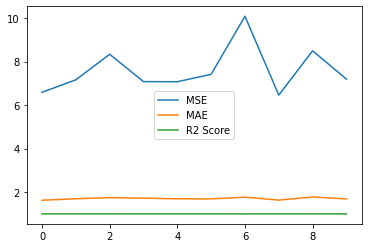

In [48]:
##### Plot MSE, MAE & R2 Score #####
plt.plot(MSE_, label = 'MSE')
plt.plot(MAE_, label = 'MAE')
plt.plot(R2_Score_, label = 'R2 Score')

plt.legend()

plt.show()

Use Neural Network to evaluate the model

In [49]:
##### Create a sequential model #####

model = Sequential()

##### Create first hidden layer with 128 neurons with L1 regularization #####

model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L1(), input_dim = X.shape[1]))

##### Create second hidden layer with 64 neurons with L1 regularization #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L1()))

##### Create third hidden layer with 32 neurons with L1 regularization #####

model.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L1()))

##### Create an output layer with linear #####

model.add(Dense(units = 1, activation = 'linear'))

#####  Compile the model #####

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

##### Plot the model summary #####

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [50]:
##### fit the model and run #####

history_ = model.fit(x = X_train, y = y_train, epochs = 1000, batch_size = 128, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/1000
106/106 [==============================] - 1s 4ms/step - loss: 6631.6025 - val_loss: 353.7423
Epoch 2/1000
106/106 [==============================] - 0s 3ms/step - loss: 195.5232 - val_loss: 144.6116
Epoch 3/1000
106/106 [==============================] - 0s 3ms/step - loss: 119.3974 - val_loss: 93.9059
Epoch 4/1000
106/106 [==============================] - 0s 3ms/step - loss: 73.4498 - val_loss: 52.9888
Epoch 5/1000
106/106 [==============================] - 0s 3ms/step - loss: 40.7501 - val_loss: 30.4174
Epoch 6/1000
106/106 [==============================] - 0s 3ms/step - loss: 26.6440 - val_loss: 23.4783
Epoch 7/1000
106/106 [==============================] - 0s 3ms/step - loss: 22.6012 - val_loss: 21.3209
Epoch 8/1000
106/106 [==============================] - 0s 3ms/step - loss: 20.7953 - val_loss: 20.3644
Epoch 9/1000
106/106 [==============================] - 0s 3ms/step - loss: 19.6232 - val_loss: 19.1119
Epoch 10/1000
106/106 [==============================] - 0

In [51]:
##### Evaluate the model performance #####

predicted_ = model.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of NN is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of NN is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of NN is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(10)

47/47 [==============================] - 0s 1ms/step
Mean Squared Error of NN is   =  0.18347000867249885 

Mean absolute Error of NN is  =  0.3398405779202779 

The R2 score of NN is in here =  0.9999539995623197 

The adjusted R2 score of here =  0.9999537837425718 



Actual   Predicted
831    162.0  160.967010
1323    42.0   42.121807
376    239.0  238.779846
126    135.0  134.542862
646    134.0  133.582642
172      7.0    7.236000
959    160.0  159.932602
656    208.0  208.297745
1440    50.0   49.863140
218     41.0   40.387169

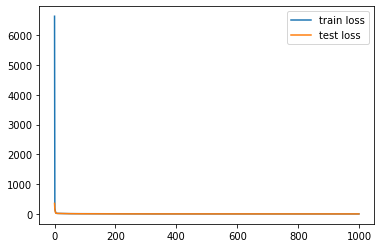

In [52]:
##### Plot the loss and val loss of the model #####

plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

In [53]:
##### Use KFold Cross Validation #####

##### KFold Cross Validation #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 1
MSE_, MAE_, R2_Score_ = [], [], []

for train_index_, test_index_ in KFold_.split(X, y):

  print(f"# of Cross Validation {count_} is running.\n")

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### fit the model #####
  history_ = model.fit(x = X_train, y = y_train, epochs = 1000, batch_size = 128, validation_data = (X_test, y_test), verbose = 1)

  predicted_ = model.predict(X_test)

  ##### Store all data into the list #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  R2_Score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

Streaming output truncated to the last 5000 lines.
Epoch 505/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6136 - val_loss: 0.6090
Epoch 506/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6304 - val_loss: 0.6347
Epoch 507/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6196 - val_loss: 0.6499
Epoch 508/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6162 - val_loss: 0.6724
Epoch 509/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6088 - val_loss: 0.6347
Epoch 510/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6325 - val_loss: 0.6312
Epoch 511/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6287 - val_loss: 0.6075
Epoch 512/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6152 - val_loss: 0.6087
Epoch 513/1000
106/106 [==============================] - 0s 3ms/step - loss: 0.6182 - val_loss: 0.6397
Epoch 514/100

In [54]:
##### Evaluate the performance #####

print("The orginal list of MSE looks like: ", MSE_,'\n')
print("The orginal list of MAE looks like: ", MAE_,'\n')
print("The orginal list of R2 Score looks like: ", R2_Score_,'\n')

print("*"*200)

print("Using KFold = 10, the MSE score is = ", np.array(MSE_).mean(),'\n')
print("Using KFold = 10, the MAE score is = ", np.array(MAE_).mean(),'\n')
print("Using KFold = 10, the R2 score is = ", np.array(R2_Score_).mean(),'\n')

The orginal list of MSE looks like:  [0.1662067343207025, 0.19686246823640466, 0.218713490592584, 0.1935334726013246, 0.20660600686218772, 0.16222323576030623, 0.16578028536207623, 0.16660129420930497, 0.16902084176928536, 0.21269418281811533] 

The orginal list of MAE looks like:  [0.32101683553059895, 0.3538794502417246, 0.34452822438875835, 0.3485124811331431, 0.35892344522476194, 0.3227105480035146, 0.3230320909023285, 0.3289543475707372, 0.3203911535739899, 0.3654492299159368] 

The orginal list of R2 Score looks like:  [0.9999576069303494, 0.9999524784041022, 0.999941915183385, 0.9999500477122807, 0.9999415642866757, 0.9999599478318557, 0.9999583079835773, 0.9999566815104921, 0.9999557085077989, 0.9999466513979567] 

********************************************************************************************************************************************************************************************************
Using KFold = 10, the MSE score is =  0.18582420125322915 

Using 

In [55]:
##### Comments after analysis ####
print("After using KFold = 10, the NN is working far more better than ML with KFold = 10.\n")

After using KFold = 10, the NN is working far more better than ML with KFold = 10.



In [56]:
df.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0       0   68   190.0    94.0      29.0       105.0       40.8     231.0
1       1   20   166.0    60.0      14.0        94.0       40.3      66.0
2       0   69   179.0    79.0       5.0        88.0       38.7      26.0
3       1   34   179.0    71.0      13.0       100.0       40.5      71.0
4       1   27   154.0    58.0      10.0        81.0       39.8      35.0

Using PCA to extract features to train the model more faster

In [57]:
##### Using PCA in this dataset #####

PCA_ = PCA(n_components = None)
print(PCA_.fit_transform(X))

print('\n\n')

print("after being applied PCA - the Explained variance is given below.\n", PCA_.explained_variance_,'\n\n')
print("after being applied PCA - the Explained variance ratio is given below.\n", PCA_.explained_variance_ratio_,'\n\n')

[[-2.44407729e+00  1.56946450e+00  1.39006839e+00 ... -7.39549754e-02
   4.71094594e-01  2.21933174e-02]
 [ 3.00220098e-01 -1.50462398e+00 -1.28544551e+00 ... -3.02917063e-01
  -2.96969957e-01 -1.48163830e-01]
 [ 1.93375405e+00  1.33680650e+00  1.49727715e+00 ...  5.95094265e-01
   1.45517799e-01 -2.35857799e-01]
 ...
 [ 5.77768991e-01 -1.77612136e+00  8.47930564e-02 ... -5.12704058e-01
   1.46237207e-01 -1.52774607e-02]
 [ 2.41551555e+00  2.76828091e+00  2.03423152e+00 ...  6.60435991e-01
   2.57367079e-01 -5.64394967e-04]
 [-4.60987506e-01  6.14293880e-01  1.13624527e+00 ... -7.24987964e-01
   6.28727285e-03  5.67448880e-02]]



after being applied PCA - the Explained variance is given below.
 [2.68837154 2.64020141 1.00239159 0.32494442 0.23374015 0.0799679
 0.03084969] 


after being applied PCA - the Explained variance ratio is given below.
 [0.38402747 0.37714649 0.14318925 0.04641754 0.03338922 0.01142322
 0.0044068 ] 




In [58]:
##### Find out 90% variance and pca components #####
np.cumsum(PCA_.explained_variance_ratio_)

array([0.38402747, 0.76117396, 0.90436321, 0.95078075, 0.98416997,
       0.9955932 , 1.        ])

In [59]:
##### Use PCA with n_components = 3 and such this way we will obtain 90% variance #####

PCA_ = PCA(n_components = 3)
X = PCA_.fit_transform(X)

##### split the dataset in train and test #####

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, shuffle = True)

print(f"The # of X_train is = {X_train.shape}\n")
print(f"The # of X_test  is = {X_test.shape}\n")
print(f"The # of y_train is = {y_train.shape}\n")
print(f"The # of y_test  is = {y_test.shape}\n")

The # of X_train is = (10500, 3)

The # of X_test  is = (4500, 3)

The # of y_train is = (10500,)

The # of y_test  is = (4500,)



Use same NN to train the model and evaluate the model performance

In [60]:
##### Create a sequential model #####

model = Sequential()

##### Create first hidden layer with 128 neurons with L1 regularization #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L1(), input_dim = X.shape[1]))

##### Create second hidden layer with 64 neurons with L1 regularization #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L1()))

##### Create third hidden layer with 32 neurons with L1 regularization #####

model.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L1()))

##### Create an output layer with linear #####

model.add(Dense(units = 1, activation = 'linear'))

#####  Compile the model #####

model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

##### Plot the model summary #####

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [61]:
##### fit the model and run #####

history_ = model.fit(x = X_train, y = y_train, epochs = 1000, batch_size = 256, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/1000
42/42 [==============================] - 1s 6ms/step - loss: 9781.9189 - val_loss: 7071.7896
Epoch 2/1000
42/42 [==============================] - 0s 3ms/step - loss: 3400.4873 - val_loss: 734.6071
Epoch 3/1000
42/42 [==============================] - 0s 3ms/step - loss: 488.2298 - val_loss: 357.9557
Epoch 4/1000
42/42 [==============================] - 0s 3ms/step - loss: 344.8183 - val_loss: 298.8506
Epoch 5/1000
42/42 [==============================] - 0s 3ms/step - loss: 298.7542 - val_loss: 264.3551
Epoch 6/1000
42/42 [==============================] - 0s 3ms/step - loss: 269.7925 - val_loss: 242.7450
Epoch 7/1000
42/42 [==============================] - 0s 3ms/step - loss: 247.5133 - val_loss: 223.1920
Epoch 8/1000
42/42 [==============================] - 0s 3ms/step - loss: 229.8962 - val_loss: 208.4374
Epoch 9/1000
42/42 [==============================] - 0s 3ms/step - loss: 212.8459 - val_loss: 192.6502
Epoch 10/1000
42/42 [==============================] - 0s 4ms

In [62]:
##### Evaluate the model performance #####

predicted_ = model.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of NN is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of NN is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of NN is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(10)

141/141 [==============================] - 0s 1ms/step
Mean Squared Error of NN is   =  50.13214386894548 

Mean absolute Error of NN is  =  5.231105972819858 

The R2 score of NN is in here =  0.9871352752994211 

The adjusted R2 score of here =  0.9871266911859643 



Actual   Predicted
3221    24.0   25.119413
532     29.0   28.295177
2202   171.0  193.435349
2175    36.0   35.945442
1574    29.0   28.175297
707     26.0   26.158972
3442    25.0   32.501476
3002    40.0   44.687527
1400   141.0  134.714005
1268    49.0   57.247395

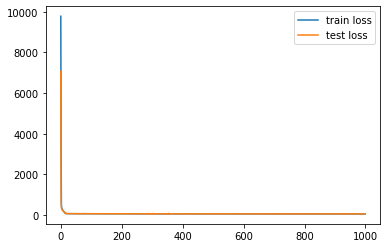

In [63]:
##### Plot the loss and val loss of the model #####

plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

In [64]:
##### Linear Regression to evaluate the model #####
RandomForestRegressor_ = RandomForestRegressor()
RandomForestRegressor_.fit(X_train, y_train)

predicted_ = RandomForestRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  58.31290284444444 

Mean absolute Error of LR is  =  5.597768888888889 

The R2 score of LR is in here =  0.9849602174621892 

The adjusted R2 score of here =  0.9849501820201043 



Actual  Predicted
3809    69.0      69.00
2985     7.0       6.72
1251    60.0      60.54
571     31.0      34.90
993     11.0      12.86
2784    35.0      32.65
1578    49.0      55.79

Use Pearson Correlation Technique to find out the best features


In [65]:
def correlation(dataset_, threshold_):
    
    col_corr_ = set()
    corr_matrix = dataset_.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold_:
                col_name_ = corr_matrix.columns[i]
                col_corr_.add(col_name_)
                
    return col_corr_

In [66]:
##### Find out, the correlated features #####

features_ = correlation(df.iloc[:, :-1], 0.85)

print("The correlated features is: ", list(features_))

The correlated features is:  ['Heart_Rate', 'Body_Temp', 'Weight']


In [67]:
selected_features_ = []
features_ = list(features_)

for column_ in df.columns:
  if column_ in features_:
    pass
  else:
    selected_features_.append(column_)
  
print("The selected columns are: ", selected_features_, '\n')

The selected columns are:  ['Gender', 'Age', 'Height', 'Duration', 'Calories'] 



In [68]:
##### Scaling the data and split into train and test #####

new_df = df[selected_features_]

X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

##### Preprocessing the dataset #####

standard_scaler_ = RobustScaler()
X = standard_scaler_.fit_transform(X)

##### split the dataset in train and test #####

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, shuffle = True)

print(f"The # of X_train is = {X_train.shape}\n")
print(f"The # of X_test  is = {X_test.shape}\n")
print(f"The # of y_train is = {y_train.shape}\n")
print(f"The # of y_test  is = {y_test.shape}\n")

The # of X_train is = (10500, 4)

The # of X_test  is = (4500, 4)

The # of y_train is = (10500,)

The # of y_test  is = (4500,)



In [69]:
##### Linear Regression to evaluate the model #####
RandomForestRegressor_ = RandomForestRegressor()
RandomForestRegressor_.fit(X_train, y_train)

predicted_ = RandomForestRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of RF is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of RF is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of RF is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of RF is   =  174.02733847673892 

Mean absolute Error of RF is  =  9.214851130511464 

The R2 score of RF is in here =  0.9543905137697568 

The adjusted R2 score of here =  0.9543499269077054 



Actual  Predicted
1760   182.0    174.490
3531    89.0     73.005
1653   121.0    115.300
900    138.0    133.450
1963   149.0    142.040
83     102.0    106.860
1626   104.0     91.890

In [70]:
##### Voting Regressor used to evaluate the model ####

estimators_ = [
    ('RF', RandomForestRegressor()),
    ('GBR', GradientBoostingRegressor()),
    ('XGB', XGBRegressor())
]

VotingRegressor_ = VotingRegressor(estimators = estimators_, n_jobs = -1)
VotingRegressor_.fit(X_train, y_train)

predicted_ = VotingRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  146.29380997189864 

Mean absolute Error of LR is  =  8.48002387483888 

The R2 score of LR is in here =  0.9611929880554414 

The adjusted R2 score of here =  0.961158454563166 



Actual   Predicted
2851   184.0  161.266401
1626   104.0   94.990524
4201   103.0  119.198898
1542   175.0  155.660894
2805    68.0   72.984576
602    238.0  217.878461
1908    26.0   26.478950

In [71]:
##### Linear Regression to evaluate the model #####
LinearRegression_ = LinearRegression()
LinearRegression_.fit(X_train, y_train)

predicted_ = LinearRegression_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')


y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

Mean Squared Error of LR is   =  265.5847099235107 

Mean absolute Error of LR is  =  12.231773522482946 

The R2 score of LR is in here =  0.9263538363829159 

The adjusted R2 score of here =  0.926288300308507 



Actual   Predicted
2608   157.0  140.038567
2506   144.0  146.883032
3631    46.0   56.680793
4494   128.0  112.013995
568      4.0    2.720569
872    124.0  120.087468
4009   124.0  115.188196

In [72]:
##### Use XGBOOST regressor to evaluate the model #####

XGBRegressor_ = XGBRegressor()
XGBRegressor_.fit(X_train, y_train)

predicted_ = XGBRegressor_.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of LR is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of LR is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of LR is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(7)

[15:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error of LR is   =  146.55417689266844 

Mean absolute Error of LR is  =  8.50954703728358 

The R2 score of LR is in here =  0.9609603717389142 

The adjusted R2 score of here =  0.9609256312465796 



Actual   Predicted
761    101.0  104.077271
509    120.0  115.142403
1459    45.0   44.413055
3071   158.0  147.614334
482    191.0  160.874390
2203   111.0  102.541756
2271   211.0  211.143951

In [73]:
##### Create a sequential model #####

model = Sequential()

##### Create first hidden layer with 128 neurons with L2 regularization #####

model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2(), input_dim = X.shape[1]))

##### Batch Normalization #####

model.add(BatchNormalization())

##### Create second hidden layer with 64 neurons with L2 regularization #####

model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Batch Normalization #####

model.add(BatchNormalization())

##### Create an output layer with linear #####

model.add(Dense(units = 1, activation = 'linear'))

#####  Compile the model #####

model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'mean_squared_error')

##### Plot the model summary #####

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,345
Non-traina

In [74]:
##### fit the model and run #####

history_ = model.fit(x = X_train, y = y_train, epochs = 1000, batch_size = 128, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/1000
83/83 [==============================] - 1s 6ms/step - loss: 11704.7988 - val_loss: 12060.4072
Epoch 2/1000
83/83 [==============================] - 0s 4ms/step - loss: 11402.3398 - val_loss: 11792.6104
Epoch 3/1000
83/83 [==============================] - 0s 4ms/step - loss: 11130.8477 - val_loss: 11485.9990
Epoch 4/1000
83/83 [==============================] - 0s 4ms/step - loss: 10897.3389 - val_loss: 11201.6777
Epoch 5/1000
83/83 [==============================] - 0s 4ms/step - loss: 10701.7402 - val_loss: 10976.4229
Epoch 6/1000
83/83 [==============================] - 0s 4ms/step - loss: 10533.4502 - val_loss: 10787.2109
Epoch 7/1000
83/83 [==============================] - 0s 4ms/step - loss: 10387.5850 - val_loss: 10624.9287
Epoch 8/1000
83/83 [==============================] - 0s 4ms/step - loss: 10252.6396 - val_loss: 10477.2109
Epoch 9/1000
83/83 [==============================] - 0s 4ms/step - loss: 10122.3730 - val_loss: 10340.2412
Epoch 10/1000
83/83 [=======

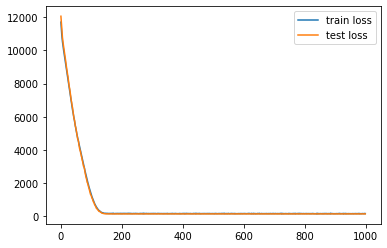

In [75]:
##### Plot the loss and val loss of the model #####

plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

In [76]:
##### Evaluate the model performance #####

predicted_ = model.predict(X_test)

number_row_ = X_test.shape[0]
number_col_ = X_test.shape[1]
r2_score_   = r2_score(predicted_, y_test)

adjusted_r2_score_ = 1 - ((1 - r2_score_)*(number_row_ - 1)/(number_row_ - 1 - number_col_))

print("Mean Squared Error of NN is   = ", mean_squared_error(predicted_, y_test),'\n')
print("Mean absolute Error of NN is  = ", mean_absolute_error(predicted_, y_test),'\n')
print("The R2 score of NN is in here = ", r2_score(predicted_, y_test),'\n')
print("The adjusted R2 score of here = ", adjusted_r2_score_,'\n')

y_test = pd.DataFrame(y_test.values, columns = ['Actual'])
predicted_ = pd.DataFrame(predicted_, columns = ['Predicted'])

pd.concat([y_test, predicted_], axis = 1).sample(10)

141/141 [==============================] - 0s 1ms/step
Mean Squared Error of NN is   =  142.30115025472543 

Mean absolute Error of NN is  =  8.38568302239312 

The R2 score of NN is in here =  0.9619999843881927 

The adjusted R2 score of here =  0.9619661690239107 



Actual   Predicted
3641   164.0  175.023392
349    170.0  198.096634
4080    96.0   77.552032
3900   155.0  172.405716
3529    22.0   21.289776
4224    63.0   85.982628
111    186.0  185.526932
833     33.0   36.829456
3806    95.0   95.270996
2706    64.0   71.192833

In [77]:
##### Use KFold Cross Validation #####

##### KFold Cross Validation #####

KFold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 1
MSE_, MAE_, R2_Score_ = [], [], []

for train_index_, test_index_ in KFold_.split(X, y):

  print(f"# of Cross Validation {count_} is running.\n")

  X_train, X_test = X[train_index_], X[test_index_]
  y_train, y_test = y[train_index_], y[test_index_]

  ##### fit the model #####
  history_ = model.fit(x = X_train, y = y_train, epochs = 1000, batch_size = 128, validation_data = (X_test, y_test), verbose = 1)

  predicted_ = model.predict(X_test)

  ##### Store all data into the list #####

  MSE_.append(mean_squared_error(predicted_, y_test))
  MAE_.append(mean_absolute_error(predicted_, y_test))
  R2_Score_.append(r2_score(predicted_, y_test))

  count_ = count_ + 1

Streaming output truncated to the last 5000 lines.
Epoch 505/1000
106/106 [==============================] - 0s 4ms/step - loss: 154.0403 - val_loss: 133.3489
Epoch 506/1000
106/106 [==============================] - 0s 4ms/step - loss: 157.4748 - val_loss: 134.1773
Epoch 507/1000
106/106 [==============================] - 0s 4ms/step - loss: 158.3306 - val_loss: 134.5312
Epoch 508/1000
106/106 [==============================] - 0s 4ms/step - loss: 162.4341 - val_loss: 134.5717
Epoch 509/1000
106/106 [==============================] - 0s 4ms/step - loss: 150.8054 - val_loss: 134.5296
Epoch 510/1000
106/106 [==============================] - 0s 4ms/step - loss: 150.9819 - val_loss: 133.5605
Epoch 511/1000
106/106 [==============================] - 0s 4ms/step - loss: 149.0475 - val_loss: 133.7416
Epoch 512/1000
106/106 [==============================] - 0s 4ms/step - loss: 150.7698 - val_loss: 134.3101
Epoch 513/1000
106/106 [==============================] - 0s 4ms/step - loss: 146.925

In [79]:
##### Evaluate the performance #####

print("The orginal list of MSE looks like: ", MSE_,'\n')
print("The orginal list of MAE looks like: ", MAE_,'\n')
print("The orginal list of R2 Score looks like: ", R2_Score_,'\n')

print("*"*200)

print("Using KFold = 10, the MSE score is = ", np.array(MSE_).mean(),'\n')
print("Using KFold = 10, the MAE score is = ", np.array(MAE_).mean(),'\n')
print("Using KFold = 10, the R2 score is = ", np.array(R2_Score_).mean(),'\n')

The orginal list of MSE looks like:  [138.09959375798886, 142.80267005045727, 143.21643111618002, 133.15386730882662, 118.33150594669063, 138.92557109033112, 143.64676382192567, 134.54224462560015, 128.45867863184364, 124.63306057123879] 

The orginal list of MAE looks like:  [8.420100203990936, 8.383475695927938, 8.382344131628672, 8.201658958236376, 7.590198897322019, 8.218225108146667, 8.257915496667227, 8.093451150258382, 7.9123377310037615, 8.017143592198689] 

The orginal list of R2 Score looks like:  [0.9626652212680818, 0.9631251119499226, 0.9620777106291736, 0.9656587876789993, 0.9653523077665283, 0.9642776238229751, 0.9605811962937323, 0.9628203293178519, 0.9660196886676058, 0.9673112387127376] 

********************************************************************************************************************************************************************************************************
Using KFold = 10, the MSE score is =  134.58103869210828 

Using KFold = 10, the MA

In [78]:
##### Comments - What i have done so far #####

# 1. Analysis the dataset - EDA performs 
# 2. Use ML and NN to evaluate the model.
# 3. Perform PCA and check the performance
# 4. As we plot heatmap() in corr() function and check the pearson correlation technique and check the performance in ML and NN

For single data prediction - We should build a class and check how much our model is off !

In [91]:
class Calories_Burned:

  store_data_ = []

  def __init__(self, Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp):
    if type(Gender) == int:
      self.Gender = Gender
      self.store_data_.append(self.Gender )
    else:
      raise Exception('Gender should be integer.')
    if ((type(Age) == int) | (type(Age) == float)) :
      self.Age = Age
      self.store_data_.append(self.Age )
    else:
      raise Exception('Age should be integer.')
    if type(Height) == float:
      self.Height = Height
      self.store_data_.append(self.Height )
    else:
      raise Exception('Height should be integer.')
    if type(Weight) == float:
      self.Weight = Weight
      self.store_data_.append(self.Weight )
    else:
      raise Exception('Weight should be integer.')
    if type(Duration) == float:
      self.Duration = Duration
      self.store_data_.append(self.Duration )
    else:
      raise Exception('Duration should be integer.')
    if type(Heart_Rate) == float:
      self.Heart_Rate = Heart_Rate
      self.store_data_.append(self.Heart_Rate )
    else:
      raise Exception('Heart_Rate should be integer.')
    if type(Body_Temp) == float:
      self.Body_Temp = Body_Temp
      self.store_data_.append(self.Body_Temp)
    else:
      raise Exception('Body_Temp should be integer.')
    
    print(self.store_data_)

  def prediction(self):
    
    test_data_ = np.array(self.store_data_)
    test_data_ = np.expand_dims(test_data_, axis = 0)
    return RandomForestRegressor_.predict(test_data_)



try:

  gender_ = int(input("Enter the Gender.(1 means Male, 0 means Female). "))
  age_    = float(input("Enter the Age. "))
  height_ = float(input("Enter the Height in CM. "))
  weight_ = float(input("Enter the weight. "))
  durati_ = float(input("Enter the Duration. "))
  Heart_  = float(input("Enter the Heart Rate. "))
  BTempt_ = float(input("Enter the Body Temp. "))
  Calories_Burned_ = Calories_Burned(gender_, age_, height_, weight_, durati_, Heart_, BTempt_)

  print(f"The output is = {Calories_Burned_.prediction()}")

except Exception as e:
  print(e)

Enter the Gender.(1 means Male, 0 means Female). 0
Enter the Age. 68
Enter the Height in CM. 190.0
Enter the weight. 94.0
Enter the Duration. 29.0
Enter the Heart Rate. 105.0
Enter the Body Temp. 40.8
[0, 68.0, 190.0, 94.0, 29.0, 105.0, 40.8]
The output is = [229.73]


In [85]:
df.head(1)

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0       0   68   190.0    94.0      29.0       105.0       40.8     231.0